In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [49]:
data = load_boston()
X = data.data
y = data.target

C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datase

In [50]:
# with warnings.catch_warnings():
#     # You should probably not use this dataset.
#     warnings.filterwarnings("ignore")
#     X, y = load_boston(return_X_y=True)

In [51]:
data_2 = pd.DataFrame(data.data, columns=data.feature_names)
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
data_2['Price'] = y
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- Price: target

In [53]:
X = data_2[['RM', 'DIS']]
print(X.head())
X = X.to_numpy()

      RM     DIS
0  6.575  4.0900
1  6.421  4.9671
2  7.185  4.9671
3  6.998  6.0622
4  7.147  6.0622


In [54]:
y = data_2[['Price']]
print(y.head())
y = y.to_numpy()

   Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Price')

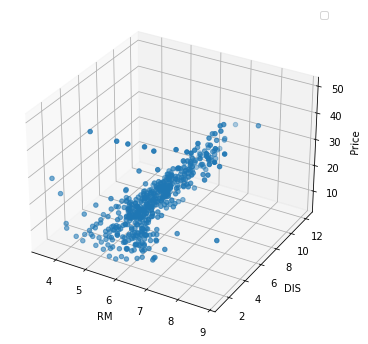

In [55]:
fig = plt.figure(figsize=(6, 6))
axis = fig.add_subplot(projection="3d")

axis.scatter(X[:, 0], X[:, 1], y)
axis.legend(loc='best')

axis.set_xlabel("RM")
axis.set_ylabel("DIS")
axis.set_zlabel("Price")

In [56]:
m = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, y))
m

array([[3.35378618],
       [0.49596792]])

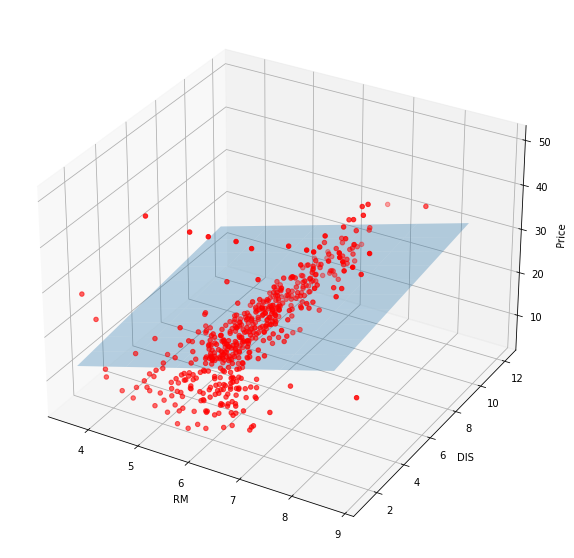

In [57]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(projection='3d')

first_range = np.arange(X[:, 0].min(), X[:, 0].max())
second_range = np.arange(X[:, 1].min(), X[:, 1].max())

first, second = np.meshgrid(first_range, second_range) 
third = first * m[0] + second * m[1]

axis.plot_surface(first, second, third, alpha = 0.3)
axis.scatter(X[:, 0], X[:, 1], y, c='red')

axis.set_xlabel("RM")
axis.set_ylabel("DIS")
axis.set_zlabel("Price")

plt.show()